In [1]:
%reset -f

In [2]:
import requests

url = "api.coincap.io/v2/assets/bitcoin/history?interval=d1"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

MissingSchema: Invalid URL 'api.coincap.io/v2/assets/bitcoin/history?interval=d1': No schema supplied. Perhaps you meant http://api.coincap.io/v2/assets/bitcoin/history?interval=d1?

In [51]:
key = "e1421d3e-4478-46d2-8760-a699a028e07a"

In [71]:
import requests
import pandas as pd
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/historical'

parameters = {
    'symbol': 'BTC',
    'count': '100',
    'interval': '12h',
    'convert' : 'USD'
}

headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': "e1421d3e-4478-46d2-8760-a699a028e07a",
}

In [72]:
resp = requests.get(url, params=parameters, headers=headers)
print(resp)

<Response [403]>


In [75]:
jsondata = json.loads(resp.text)
jsondata

{'status': {'timestamp': '2021-08-27T20:25:18.009Z',
  'error_code': 1006,
  'error_message': "Your API Key subscription plan doesn't support this endpoint.",
  'elapsed': 0,
  'credit_count': 0}}

In [74]:
CoinDF = pd.json_normalize(jsondata['data'])

KeyError: 'data'

In [60]:
CoinDF.shape

(10, 30)

In [62]:
CoinDF.sample()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,8901,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,18799137.0,18799137.0,...,41.622037,9.096263e+11,53.5677,1.016119e+12,2021-08-27T20:10:14.000Z,NaN,NaN,NaN,NaN,NaN


In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

from datetime import date, timedelta

from binance.client import Client

In [3]:
api_key = "bKln6gBUJO0cJRwnZakqNpHfmcKR5TmiqMmrkvVWgM1k0H0ZEli0mmNARIYb2b9C"
api_secret = "4dbva7d575El2ehXaqI95tZtrFvBVoG0NFPXVXlY1xikec5VgLzYWFeHNZvnEL4Y"



In [4]:
client = Client(api_key, api_secret)

In [5]:
cota_inferior = str(date.today() - timedelta(500))
print("Cota Inferior de fecha: " + cota_inferior)

Cota Inferior de fecha: 2019-12-19


In [6]:
index = 'BTCUSDT'

In [7]:
# valid intervals - 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M

bars = client.get_historical_klines(index, '1d', cota_inferior)

columnas = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
           'quote_asset_volume','number_of_trades','taker_buy_base_asset_volume',
           'taker_buy_quote_asset_volume','ignore']

In [8]:
df = pd.DataFrame(bars, columns = columnas, dtype='float')

df["open_time"] = pd.to_datetime(df["open_time"], unit='ms')

df.index = df["open_time"]

df.drop(columns=["close_time","ignore","open_time",
                 #"quote_asset_volume","taker_buy_base_asset_volume","taker_buy_quote_asset_volume"
                ], inplace = True)

df.drop(df.tail(1).index,inplace=True) # drop last n rows quitamos el día actual

print("Shape: " + str(df.shape))

pd.concat([df.head(3), df.tail(3)])

Shape: (500, 9)


,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
open_time,,,,,,,,,
2019-12-19,7277.83,7380.00,7038.31,7150.30,55509.049075,3.974077e+08,439761.0,27456.528272,1.965580e+08
2019-12-20,7151.31,7220.00,7079.50,7187.83,32132.069205,2.298427e+08,312766.0,16641.052689,1.190447e+08
2019-12-21,7188.01,7190.58,7105.00,7132.75,19467.174028,1.390692e+08,212162.0,10119.761012,7.229706e+07
2021-04-29,54846.23,55195.84,52330.94,53555.00,52486.019455,2.823220e+09,1763676.0,25339.743902,1.362821e+09
2021-04-30,53555.00,57963.00,53013.01,57694.27,68578.910045,3.808187e+09,2267648.0,35634.129087,1.978867e+09
2021-05-01,57697.25,58458.07,56956.14,57800.37,42600.351836,2.460343e+09,1743013.0,20574.810226,1.188355e+09


In [9]:
# Enfoque Clasificación
df["y_temp"] = df["close"].diff() #> 0 # Para saber si el real baja o sube
df.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,y_temp
open_time,,,,,,,,,,
2019-12-19,7277.83,7380.00,7038.31,7150.30,55509.049075,3.974077e+08,439761.0,27456.528272,1.965580e+08,NaN
2019-12-20,7151.31,7220.00,7079.50,7187.83,32132.069205,2.298427e+08,312766.0,16641.052689,1.190447e+08,37.53
2019-12-21,7188.01,7190.58,7105.00,7132.75,19467.174028,1.390692e+08,212162.0,10119.761012,7.229706e+07,-55.08
2019-12-22,7131.59,7518.54,7122.47,7501.44,39137.455150,2.855772e+08,356612.0,20625.436732,1.505541e+08,368.69
2019-12-23,7500.71,7695.38,7265.84,7317.09,68051.997203,5.107104e+08,530669.0,33444.243772,2.511168e+08,-184.35


In [11]:
df["y_temp"] = df["close"].diff() > 0
df["y_temp"] = df["y_temp"].astype(int)
df.drop(df.head(1).index, inplace=True) # drop last n rows quitamos el día actual
df.head(4)

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,y_temp
open_time,,,,,,,,,,
2019-12-20,7151.31,7220.00,7079.50,7187.83,32132.069205,2.298427e+08,312766.0,16641.052689,1.190447e+08,1
2019-12-21,7188.01,7190.58,7105.00,7132.75,19467.174028,1.390692e+08,212162.0,10119.761012,7.229706e+07,0
2019-12-22,7131.59,7518.54,7122.47,7501.44,39137.455150,2.855772e+08,356612.0,20625.436732,1.505541e+08,1
2019-12-23,7500.71,7695.38,7265.84,7317.09,68051.997203,5.107104e+08,530669.0,33444.243772,2.511168e+08,0


In [12]:
df.groupby(["y_temp"]).size()

y_temp
0    220
1    279
dtype: int64

In [13]:
def description(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Missing'] = df.isnull().sum().values
    summary['PercMissing'] = df.isnull().sum().values / df.isnull().count().values
    summary['Uniques'] = df.nunique().values
    return summary

description(df)

Dataset Shape: (499, 10)


,index,dtypes,Missing,PercMissing,Uniques
0,open,float64,0,0.0,499
1,high,float64,0,0.0,492
2,low,float64,0,0.0,493
3,close,float64,0,0.0,499
4,volume,float64,0,0.0,499
5,quote_asset_volume,float64,0,0.0,499
6,number_of_trades,float64,0,0.0,499
7,taker_buy_base_asset_volume,float64,0,0.0,499
8,taker_buy_quote_asset_volume,float64,0,0.0,499
9,y_temp,int32,0,0.0,2


In [14]:
# Get feature from dates
df['day'] = df.index.day
df['weekday'] = df.index.dayofweek
df['dayofyear'] = df.index.dayofyear

In [15]:
df.tail()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,y_temp,day,weekday,dayofyear
open_time,,,,,,,,,,,,,
2021-04-27,54001.38,55460.00,53222.00,55011.97,54064.034675,2.949719e+09,1568666.0,25631.074629,1.398732e+09,1,27,1,117
2021-04-28,55011.97,56428.00,53813.16,54846.22,55130.459015,3.020243e+09,1830042.0,26762.033422,1.466279e+09,0,28,2,118
2021-04-29,54846.23,55195.84,52330.94,53555.00,52486.019455,2.823220e+09,1763676.0,25339.743902,1.362821e+09,0,29,3,119
2021-04-30,53555.00,57963.00,53013.01,57694.27,68578.910045,3.808187e+09,2267648.0,35634.129087,1.978867e+09,1,30,4,120
2021-05-01,57697.25,58458.07,56956.14,57800.37,42600.351836,2.460343e+09,1743013.0,20574.810226,1.188355e+09,1,1,5,121


In [16]:
#https://towardsdatascience.com/building-a-comprehensive-set-of-technical-indicators-in-python-for-quantitative-trading-8d98751b5fb
# MovingAverage
values_ma = [5,15,30]

for i in values_ma:
    df["ma_close_" + str(i)] = df["close"].rolling(window=i).mean()
    df["ma_volume_" + str(i)] = df["volume"].rolling(window=i).mean()

# ExponentialMovingWindow
values_ema = [5,15,30]

for i in values_ema:
    df["ema_" + str(i)] = df["close"].ewm(span = i, adjust = False).mean()
    
# RSI https://stackoverflow.com/questions/20526414/relative-strength-index-in-python-pandas
values_rsi = [7,14,21]
close = df['close']

# Get the difference in price from previous step
delta = close.diff()

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0

for i in values_rsi:
    # Calculate the EWMA
    roll_up1 = up.ewm(span=i).mean()
    roll_down1 = down.abs().ewm(span=i).mean()

    # Calculate the RSI based on EWMA
    RS1 = roll_up1 / roll_down1
    RSI1 = 100.0 - (100.0 / (1.0 + RS1))

    # Calculate the SMA
    roll_up2 = up.rolling(i).mean()
    roll_down2 = down.abs().rolling(i).mean()

    # Calculate the RSI based on SMA
    RS2 = roll_up2 / roll_down2
    RSI2 = 100.0 - (100.0 / (1.0 + RS2))
    
    df["rsi_ewma_" + str(i)] = RSI1.values
    df["rsi_sma_" + str(i)]  = RSI2.values
    
# BollingerBand
values_bollinger = [5,10,20]
for i in values_bollinger:
    df['bollinger_upper_' + str(i)] = df['close'].rolling(window=i).mean() + (df['close'].rolling(window=i).std()  * 2)
    df['bollinger_lower_' + str(i)] = df['close'].rolling(window=i).mean() - (df['close'].rolling(window=i).std()  * 2)

# Rate of change
values_rc = [5,15,30]
for i in values_rc:
    df["rc_" + str(i)] = df["close"].pct_change(periods = i)
    
# Stochastic Oscillators
values_so = [5,15,30]
for i in values_so:
    lowest = df["low"].rolling(window = i).min()
    high = df["high"].rolling(window = i).max()
    df["so_" + str(i)] = ((df['close'] -lowest)/(high - lowest))*100
    df["so_%D" + str(i)] = df["so_" + str(i)].rolling(window = i).mean()

In [17]:
df["y"] = df["y_temp"].shift(-1)
df[["y","y_temp"]].tail()

,y,y_temp
open_time,,
2021-04-27,0.0,1
2021-04-28,0.0,0
2021-04-29,1.0,0
2021-04-30,1.0,1
2021-05-01,NaN,1


In [18]:
past_t = 30 # Es hiperparametro del modelo
minus = 3

In [19]:
list_shift = list(range(1, minus))

for i in list_shift: 
    #df["close_minus" + str(i)] = df["close"].shift(i)
    df["high_minus" + str(i)] = df["high"].shift(i)
    df["low_minus" + str(i)] = df["low"].shift(i)
    #df["open_minus" + str(i)] = df["open"].shift(i)
    df["volume_minus" + str(i)] = df["volume"].shift(i)
    df["number_of_trades" + str(i)] = df["number_of_trades"].shift(i)

In [20]:
X = df.drop(columns=["y"]).copy()
y = df["y"].copy()

In [22]:
X_train = X.iloc[(len(X) - 1 - past_t):(len(X) - 1)]
y_train = y.iloc[(len(X) - 1 - past_t):(len(X) - 1)]
X_test = X.iloc[len(X) - 1]

In [23]:
print("Shape X_train " + str(X_train.shape))
print("Shape y_train " + str(y_train.shape))
print("Shape X_test " + str(X_test.shape))

Shape X_train (30, 51)
Shape y_train (30,)
Shape X_test (51,)


In [24]:
X_train.index

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12',
               '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
               '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20',
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
               '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', name='open_time', freq=None)

In [25]:
X.index[-1]

Timestamp('2021-05-01 00:00:00')

In [26]:
X_test.name

Timestamp('2021-05-01 00:00:00')

In [28]:
from catboost import CatBoostClassifier

parameters_catboost = {'depth' : [2,4,6],
                       'learning_rate' : [0.01, 0.1],
                       'iterations' : [1000] }

modelo_catboost = CatBoostClassifier(loss_function='Logloss', # Funcion minimizadora del modelo https://catboost.ai/docs/concepts/loss-functions-regression.html
                                     verbose = 0,
                                     task_type = "CPU" #GPU
                                    )

from sklearn.model_selection import GridSearchCV

grid_catboost = GridSearchCV(estimator = modelo_catboost,
                             param_grid = parameters_catboost,
                             scoring = "roc_auc", # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                             return_train_score = True,
                             cv = 10,
                             n_jobs = -1,
                             verbose = 3              
                            )

In [29]:
grid_catboost.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000012CF5FBE430>,
             n_jobs=-1,
             param_grid={'depth': [2, 4, 6], 'iterations': [1000, 2000],
                         'learning_rate': [0.01, 0.1]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [35]:
print(grid_catboost.best_params_)

{'depth': 4, 'iterations': 1000, 'learning_rate': 0.1}


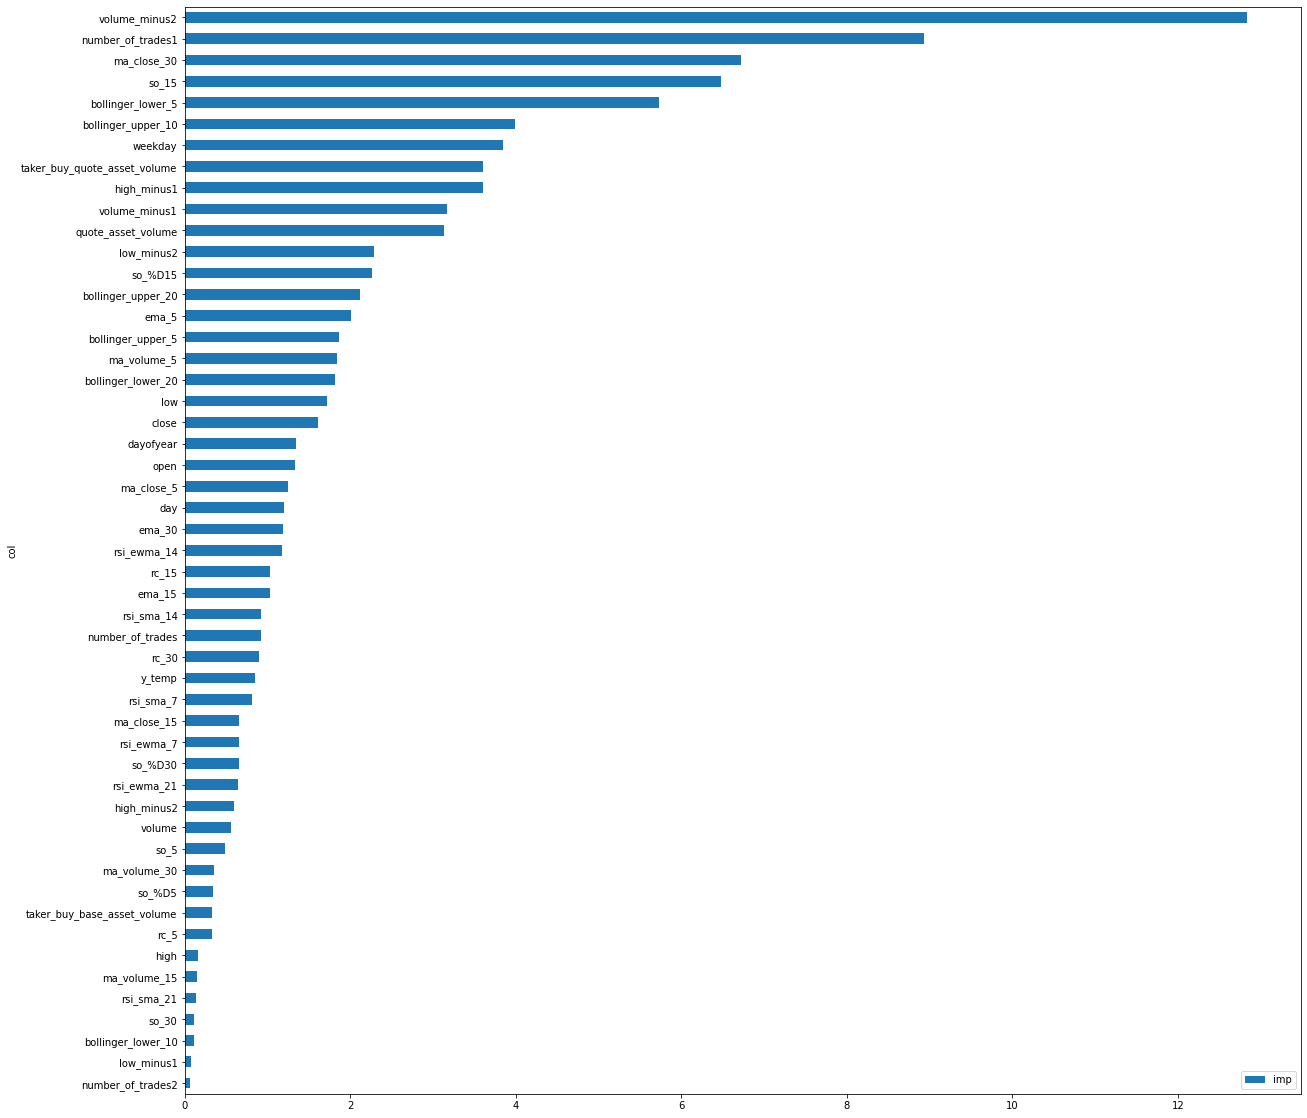

In [36]:
# Feature Importance
fea_imp = pd.DataFrame({'imp': grid_catboost.best_estimator_.feature_importances_, 'col': X_train.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])#.iloc[-20:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 20))

In [37]:
pred = grid_catboost.best_estimator_.predict(X_test)
pred

1.0

In [39]:
prob = grid_catboost.best_estimator_.predict_proba(X_test)  # El cero es que baja el close con respecto al dia anterior el 1 lo contrario
prob

array([0.01706341, 0.98293659])

In [41]:
print("Probabilidades CLOSE [" + str(index) + "] --> " + str(X_test.name + timedelta(1)) + " --> " + str(prob))

Probabilidades CLOSE [BTCUSDT] --> 2021-05-02 00:00:00 --> [0.01706341 0.98293659]


In [48]:
import requests

def telegram_sendtext(bot_message):
    bot_token = '1653124784:AAFpL0qlC_ybadcbFX6jKagauRFpiFpSf1E'
    #chatID = '469455650' # CHAT ID de tu BOT
    chatID = '-1001484622825' # Chat ID del grupo Trading
    send_text = 'https://api.telegram.org/bot' + bot_token + '/sendMessage?chat_id=' + chatID + '&parse_mode=Markdown&text=' + bot_message
    response = requests.get(send_text)
    return response.json()

telegram_sendtext(str(date.today()) + "\n" + str(index) + "/" + "CLOSE \nProbabilidad de bajada " + "--> " + str(prob[0].round(2)) +"\nProbabilidad de subida " + "--> " + str(prob[1].round(2)) )

{'ok': True,
 'result': {'message_id': 6,
  'from': {'id': 1653124784,
   'is_bot': True,
   'first_name': 'JARVIS',
   'username': 'JARVIS_Walkn_bot'},
  'chat': {'id': -1001484622825,
   'title': 'Bot Trading Forecast',
   'type': 'supergroup'},
  'date': 1619946171,
  'text': '2021-05-02\nBTCUSDT/CLOSE \nProbabilidad de bajada --> 0.02\nProbabilidad de subida --> 0.98'}}